# Predicting heart disease using machine learning


##### Creating a data dictionary

1)age (Age of the patient in years)
#
2)sex (1=Male,0=Female)
#
3)cp (chest pain type )
->0=typical angina:chest pain related decrease blood supply to heart
->1=atypical angina:chest pain not related to heart
->2=non-anginal pain:typically esophageal spasms(non heart related)
->3=asymptomatic :chest pain not showing sign of disease
#
4)trestbps- resting blood pressure (resting blood pressure    (in mm Hg on admission to the hospital)) anything above 130-140 is typically cause for concern
#
5)chol (serum cholesterol in mg/dl)
->above 200 is cause for concern
#
6)fbs (if fasting blood sugar > 120 mg/dl) (1=true, 0=false)
#
7)restecg (resting electrocardiographic results)
-- Values: [0=normal, 1=stt abnormality,2= lv hypertrophy]
#
8)thalach: maximum heart rate achieved
#
9)exang: exercise-induced angina (True/ False) (1=true or yes;0=false or no)
#
10)oldpeak: ST depression induced by exercise relative to rest
#
11)slope: the slope of the peak exercise ST segment
->0:Upsloping:better heart rate with exercise(uncommon)
->1:fastsloping:minimal change(typically healthy heart)
->2:Downslopings:sign of unhealthy heart
#
12)ca: number of major vessels (0-3) colored by fluoroscopy
#
13)thal: [1,3:normal; 6:fixed defect;7: reversible defect]
#
14)target-have disease or not (1=yes,0=no)


##preparing the tools (using pandas,numpy,matplotlib for data analysis & manipulation)


In [1]:
#importing all tools &  regular EDA(Exploratory data analysis) libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#we want our plot to be appear inside this notebook

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve



#load data

In [2]:
df = pd.read_csv("6.1 heart-disease.csv")
df.shape #rows,colmn






(303, 14)

In [3]:
#data exploration(Exploratoy data analysis or EDA)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#let's findout how many of each class here
df["target"].value_counts()


target
1    165
0    138
Name: count, dtype: int64

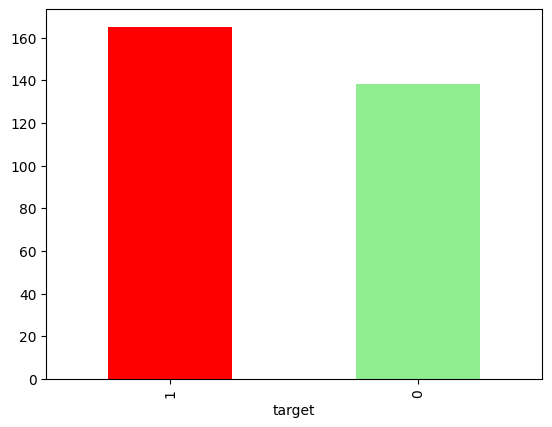

In [6]:
df["target"].value_counts().plot(kind="bar",color=["red","lightgreen"],label="Target");


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:

#are there any missing value
df.isna().sum

<bound method DataFrame.sum of        age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


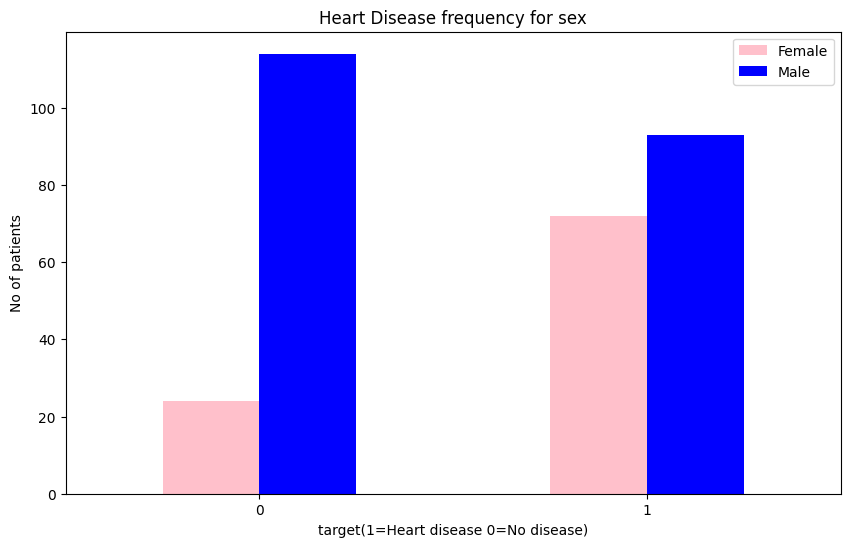

In [12]:
#creating a plot of above crosstab(we should make the visual as communicative as possible)
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["pink","blue"],ylabel="No of patients",xlabel="target(1=Heart disease 0=No disease)")
plt.title("Heart Disease frequency for sex")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [13]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

Age vs Max Heart rate for heart disease

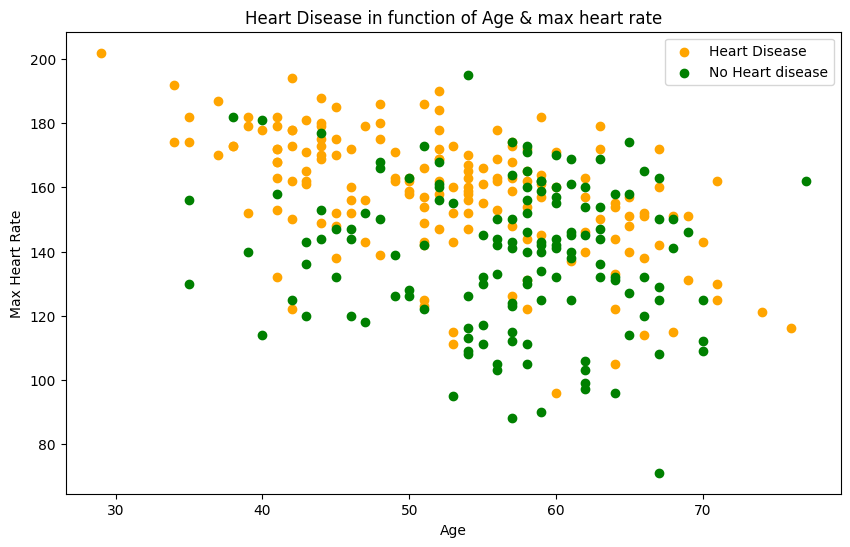

In [14]:
#creating another figure
plt.figure(figsize=(10,6))

#scatter with positive examples (matlab wohi age jisme heart disease ho rhe ho & wohi max heart rate jisme heart disease ho rha ho.usko compare karna graph m ki kya relation h)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="orange")

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="green")

plt.title("Heart Disease in function of Age & max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart disease"]);


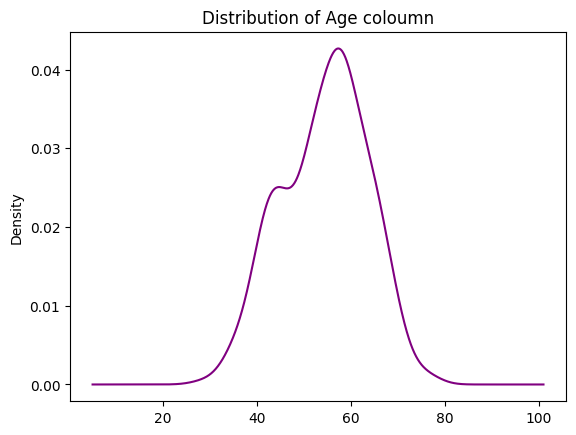

In [15]:
#check the distribution of age coloumn through histogram
#df.age.value_counts()
df.age.plot.kde(xlabel="Age",color="purple") #kde-kernel density estimation 
plt.title("Distribution of Age coloumn");

Heart disease frequency for chest pain type

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


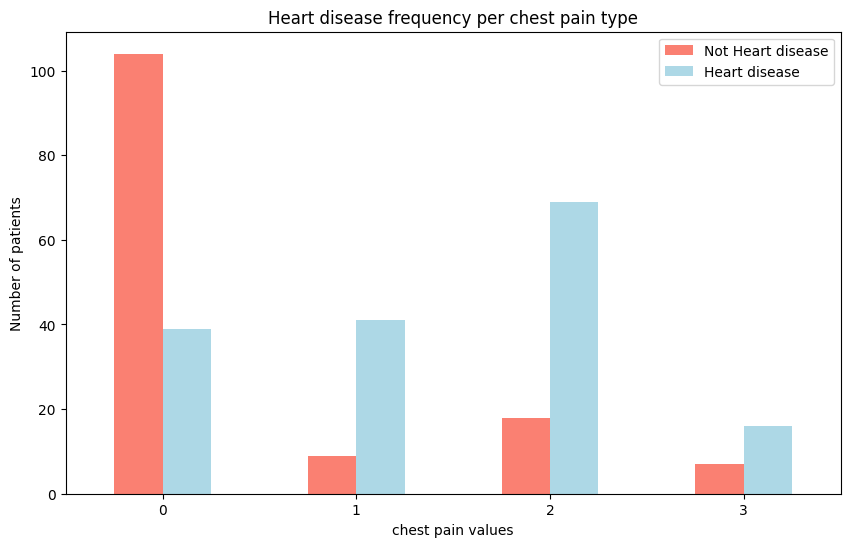

In [17]:
#make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.legend(["Not Heart disease","Heart disease"])
plt.xlabel("chest pain values")
plt.ylabel("Number of patients")
plt.xticks(rotation=0);


Correlational matrix=how independent variable related to each other.
#
A higher positive value means a potential positive correlation
#
A higher negative value means a potential negative correlation
#
Negative correlation=a relationship between 2 variables in which 1 variable increases as the other decreases


In [18]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


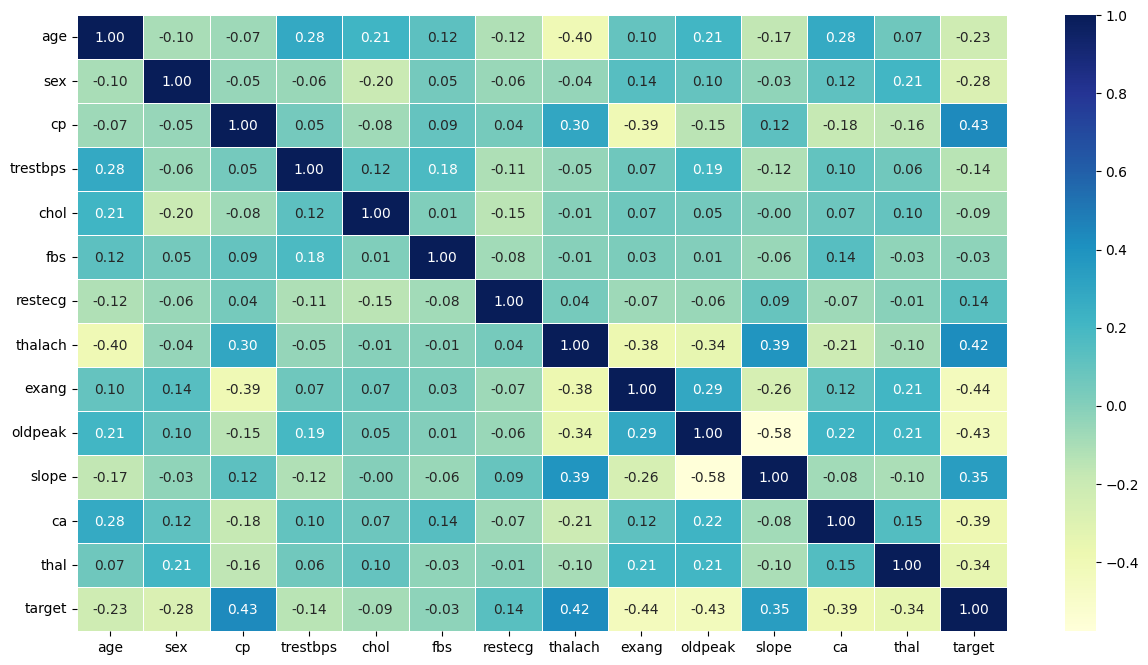

In [19]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu");

##### A low degree -ve correlation between exang & heart disease(target) as we see in the above correlation matrix heatmap

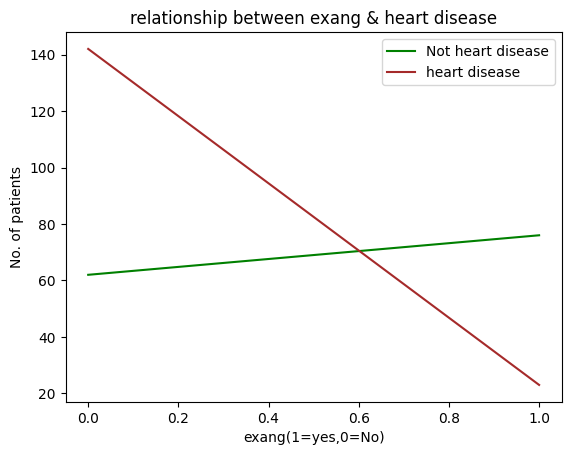

In [20]:
pd.crosstab(df.exang,df.target).plot(kind="line",color=["green","brown"])
plt.legend(["Not heart disease","heart disease"])
plt.ylabel("No. of patients")
plt.xlabel("exang(1=yes,0=No)")
plt.title("relationship between exang & heart disease");


### Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#splitting data in to x&y (x=features y=target)
x=df.drop("target",axis=1)
y=df.target

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
#split data in to train & test sets
np.random.seed(42)

#split in to train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
#test_size=0.2 means 20% of the dataset will allocated for test data & 80% of the dataset for training data


In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

###### Now we have got our data split in to training data set & test data set.Now we will train the model (finding patterns) on the training data set & we will test it(use the patterns) on the test data set.

###### we are going to try 3 different ML models:
###### 1)Logistic regression
###### 2)K-nearest neighbour classifier
###### 3)Random forest classifier

In [29]:
#put the models in to a dictionary {key=name,value=model}
models={"Logistic Regression": LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

#create a function to fit & score models

def function(models,x_train,x_test,y_train,y_test):
   '''
   This function will fit the data & evaluate the given machine learning models
   models=A dictionary of different scikit-learn machine learning model
   x_train:Training data(no labels)
   x_test:testing data(no labels)
   y_train:training labels
   y_test:testing labels
   '''
   np.random.seed(42)
   
   #make a dictionary to store model scores
   
   model_scores={}
   
   #loop through models
   for name,model in models.items():
       #fit the model to the data
       model.fit(x_train,y_train)
       #evaluate the model & append it's score to model_scores
       model_scores[name]=model.score(x_test,y_test)
   return model_scores 
       
   


In [30]:
model_scores=function(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\LAPTOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

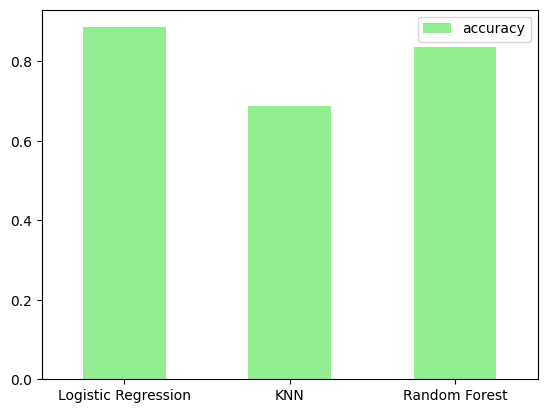

In [31]:
#model comparision in terms of accuracy
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color="lightgreen")
plt.xticks(rotation=0);

###### Now we have got a baseline model & we know model's first predictions are not always the same what we aim for.
###### let's look at the following:
###### ->Hyperparameter tuning
###### ->Feature importance
###### ->Confusion matrix
###### ->cross validation
###### ->precision
###### ->Recall
###### ->F1 score
###### ->Classification report
###### ->ROC Curve
###### ->Area under curve(AUC)

In [32]:
 #hyperparameter tuning (jaise hum udhar gradient descent kar rhe the optimal w and b k liye)
 
 #in KNN
train_scores=[]
test_scores=[]

#create a list of different values for n_neighbos
neighbors=range(1,21)

#set up KNN instances
knn=KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test scores list
    test_scores.append(knn.score(x_test, y_test))
    
    
    
    


 
 

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data after hypertuing is:75.409836%
Our goal was to achieve 93 percent accuracy but KNN model failed to get that even after hypertuning.Let's try another models


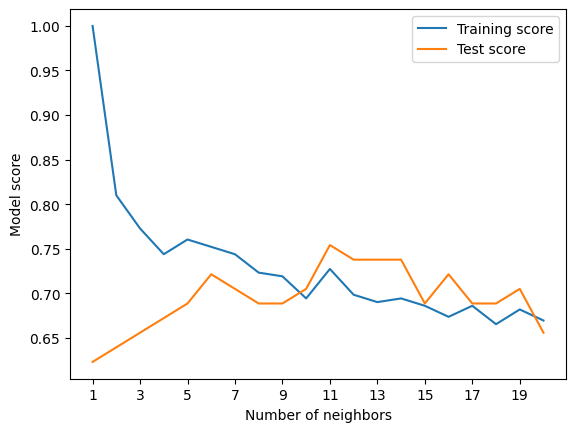

In [35]:
plt.plot(neighbors,train_scores,label="Training score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,2))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data after hypertuing is:{max(test_scores)*100:2f}%")
if max(test_scores) < 0.93 :
    print("Our goal was to achieve 93 percent accuracy but KNN model failed to get that even after hypertuning.Let's try another models")
else:
    print("We have successfully achieved 93 percent accuracy. Let's try another models")

In [36]:
#Hyperparameter tuning with RandomizedSearchCV. (CV-cross validation)
#we are going to tune 1) LogisticRegression() 2)RandomForestClassifier()

#create a hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

#create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}


In [37]:
#let's tune the models using RandomizedSearchCV

#Tune logistic regression
np.random.seed(42)

#setup random hyperparameter search for logistic regression
rs_log_reg =RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

###### Now we have tuned logistic regression model & got the accuracy score 88.5% just like before without tuning .Now let's tune RandomForestClassifier() model.

In [40]:
#setup random seed
np.random.seed(42)

#set up random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

#fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
#find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
#Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)

0.8688524590163934

###### After hyperparameter tuning the RandomForestClassifier model gives us an accuracy of 86.8%

###### Now Let's tune the model using GridSearchCV

In [43]:
#hyperparameter tuning using GridSearchCV

#since our LogisticRegression model provides the best scores so far,we will try & improve them again using GridSearchCV

log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}

#setup grid hyperparameter search for LogisticRegression

gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)


#fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [44]:
#checking best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
#Evaluate the GridSearchCV LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

###### In hyperparameter tuning by GridSearchCV method we also get LogisticRegression model has the accuracy of 88.5% just like before !!!!

###### Evaluating our tuned machine learning classifier beyond accuracy
###### ->ROC Curve & AUC score
###### ->Confusion matrix
###### ->Classification report
###### ->Precision
###### ->Recall
###### ->F1-score

In [46]:
#To make comparisions & evaluate our trained model,first we need to make predictions

#Make prediction with tuned model
y_preds =gs_log_reg.predict(x_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

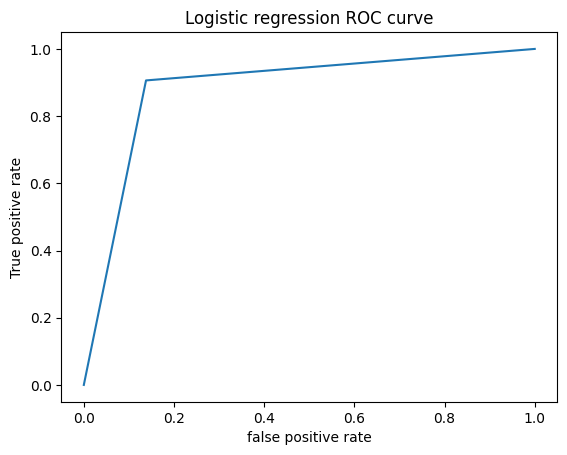

In [49]:
# import ROC curve function from the sklearn.metrics module
#plot ROC curve & calculate & calculate AUC metric
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr,tpr,thresholds = roc_curve(y_test,y_preds)

#plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression ROC curve')
plt.show()



In [50]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


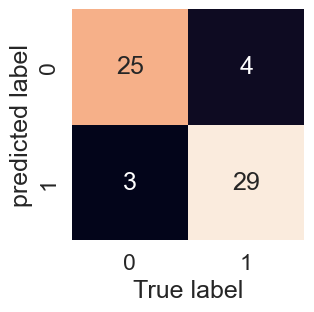

In [51]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    
    
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)

###### Now we have got a ROC curve,an AUC metric and a confusion matrix.now it;s time to get a classification report as well as cross-validated precision,recall and f1-score


In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###### The above evaluation metrics is due to single train & test split.Now we r going to calculate accuacy,precision,recall & f1 score of our model using cross-validation using 'cross_val_score()'

In [53]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
#create a new classifier with best parameters
clf=LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [55]:
#cross-validated accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [56]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [57]:
#cross validated precision
cv_pre=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [58]:
#cross validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [59]:
#cross validated f1-score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

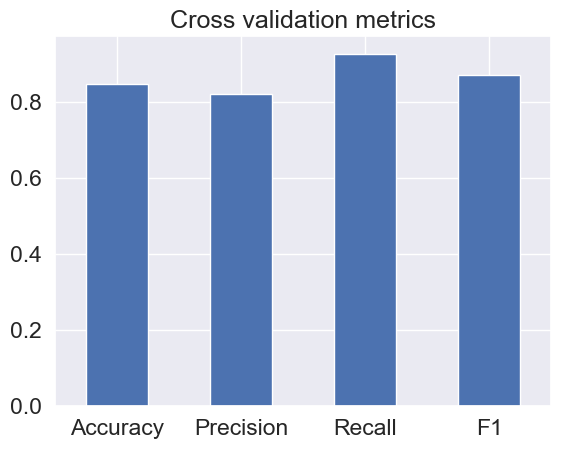

In [60]:
#visualize cross validated metrics
cv_metrics =pd.DataFrame({'Accuracy':cv_acc,'Precision':cv_pre,'Recall':cv_recall,'F1':cv_f1},index=[0])

cv_metrics.T.plot.bar(title="Cross validation metrics",legend=False)
plt.xticks(rotation=0);

###### feature importance=which feature has contributed most to the outcomes of the model & how did they contribute

###### finding feature importance is different for each machine learning model


In [61]:
#fit an instance of logistic regression

clf=LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

clf.fit(x_train,y_train);

In [62]:
#check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [63]:
#match coef's of features to columns
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

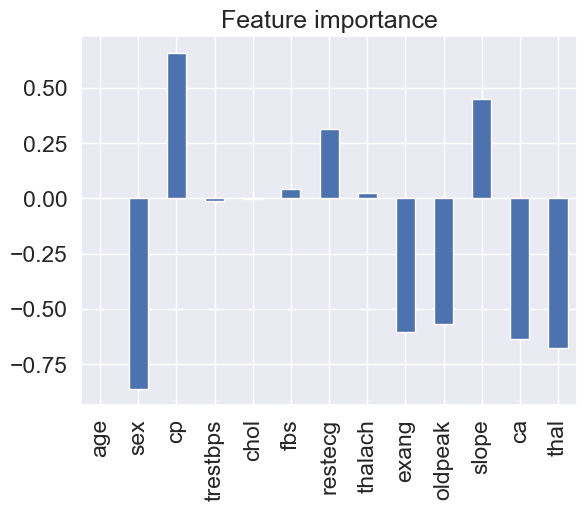

In [64]:
#visualize features importance
feature_df =pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);


In [65]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [66]:
pd.crosstab(df.sex,df.target) 

target,0,1
sex,,
0,24,72
1,114,93


In [68]:
import pickle
import requests
import json

In [80]:
pickle.dump(gs_log_reg, open('model.pkl','wb'))

In [82]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(x_test))

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
